In [763]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

In [764]:
def gaussian(x, μ, σ):
    return 1/np.sqrt(2*np.pi*σ**2) * np.exp(-(x-μ)**2/(2*σ**2))

In [775]:
def generate_traces(trace_length, amplitude, ratio, sigma, nr_traces):
    x = np.arange(trace_length)
    trace_closed = gaussian(x, 1000, 200)*amplitude
    trace_open = ratio*trace_closed.copy()
    d_open = np.array([trace_open + np.random.randn(trace_length)*sigma for _ in range(nr_traces)])
    d_closed = np.array([trace_closed + np.random.randn(trace_length)*sigma for _ in range(nr_traces)] )
    return x, d_closed, d_open

In [776]:
nr_traces = 2000
trace_length = 2000
ratio = 3.5
sigma = np.sqrt(2)
amp = 1/(1/np.sqrt(2*np.pi*200**2)) 
offset = 32

In [777]:
x, d_closed, d_open = generate_traces(trace_length, amp, ratio, sigma, nr_traces)

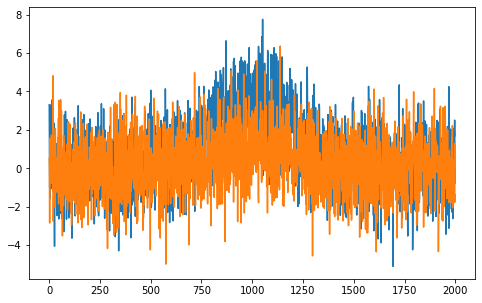

In [778]:
fig, ax = plt.subplots(figsize = (8,5))
ax.plot(x, d_open[0,:])
ax.plot(x, d_closed[0,:])

In [779]:
def lowpass_data(data, freq, sampling_freq, order = 10):
    sos = signal.butter(order, freq, 'lp', fs=sampling_freq, output='sos')
    return signal.sosfilt(sos, data)

In [780]:
# add offset after lowpas to prevent spike at start of trace
lowpass_open = lowpass_data(d_open, 10e3, 100e3, order = 1) + offset
lowpass_closed = lowpass_data(d_closed, 10e3, 100e3, order = 1) + offset

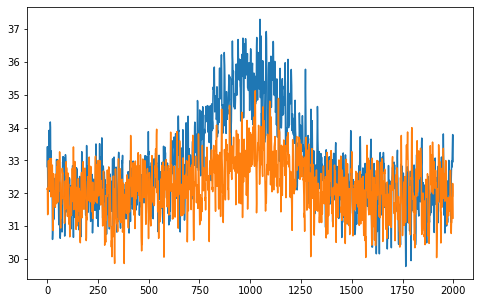

In [781]:
fig, ax = plt.subplots(figsize = (8,5))
ax.plot(x, lowpass_open[0,:])
ax.plot(x, lowpass_closed[0,:])

## Now analyzing ratios

In [782]:
# mean subtract
lowpass_open -= np.mean(lowpass_open[:,150:250], axis = 1)[:, np.newaxis]
lowpass_closed -= np.mean(lowpass_closed[:,150:250], axis = 1)[:, np.newaxis]

In [783]:
np.trapz(lowpass_open.mean(axis = 0))/np.trapz(lowpass_closed.mean(axis = 0))

3.53377369983941

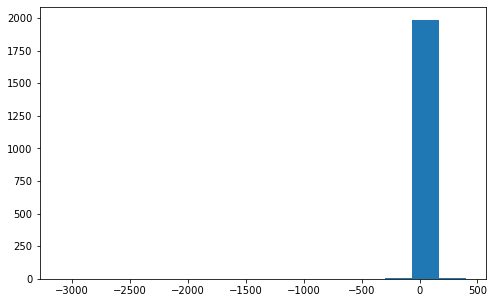

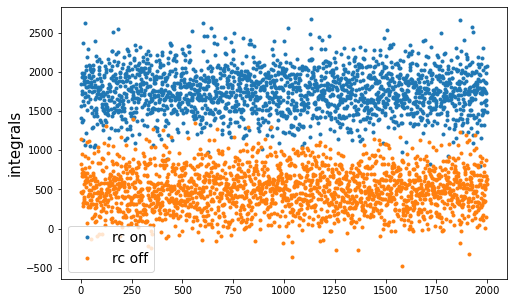

In [784]:
integrals_open = np.trapz(lowpass_open, axis = 1)
integrals_closed = np.trapz(lowpass_closed, axis = 1)
ratios = integrals_open/integrals_closed
fig, ax = plt.subplots(figsize = (8,5))
ax.hist(ratios, bins = 15);

fig, ax = plt.subplots(figsize = (8,5))
ax.plot(integrals_open, '.', label = 'rc on')
ax.plot(integrals_closed, '.', label = 'rc off')
ax.legend(fontsize = 14)
ax.set_ylabel('integrals', fontsize = 15);

We don't just see normal noise on the signal, we also have noise on the amplitudes (signal size)

In [785]:
def generate_amp_noise_array(nr_traces, sigma):
    amp_noise = []
    for _ in range(nr_traces):
        while True:
            an = 1+np.random.randn(1)*sigma
            if an >= 0:
                amp_noise.append(an[0])
                break
    return np.array(amp_noise)

def generate_amp_noise(sigma):
    while True:
        an = 1+np.random.randn(1)[0]*sigma
        if an >= 0:
            return an

In [787]:
sigma = 2
amplitude = amp
σamplitude = 1
x = np.arange(trace_length)

trace_closed = gaussian(x, 1000, 200)*amplitude
trace_open = ratio*trace_closed.copy()

do = np.array([trace_open * generate_amp_noise(σamplitude) + np.random.randn(trace_length)*sigma for _ in range(nr_traces)])
dc = np.array([trace_closed * generate_amp_noise(σamplitude)+ np.random.randn(trace_length)*sigma for _ in range(nr_traces)] )

lowpass_open = lowpass_data(do, 10e3, 100e3, order = 1) - offset
lowpass_closed = lowpass_data(dc, 10e3, 100e3, order = 1) - offset

# # mean subtract
lowpass_open -= np.mean(lowpass_open[:,150:250], axis = 1)[:, np.newaxis]
lowpass_closed -= np.mean(lowpass_closed[:,150:250], axis = 1)[:, np.newaxis]

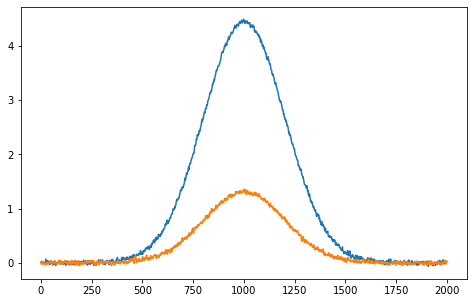

In [788]:
fig, ax = plt.subplots(figsize = (8,5))
ax.plot(lowpass_open.mean(axis = 0))
ax.plot(lowpass_closed.mean(axis = 0))

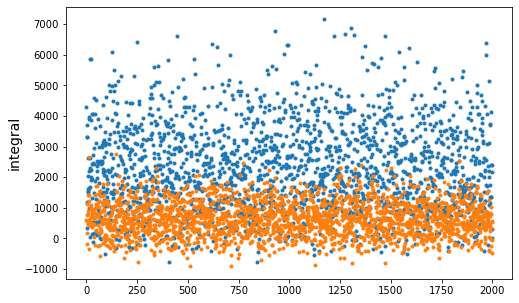

In [789]:
fig, ax = plt.subplots(figsize = (8,5))
ax.plot(np.trapz(lowpass_open, axis = 1), '.')
ax.plot(np.trapz(lowpass_closed, axis = 1), '.')
ax.set_ylabel('integral', fontsize = 14);

In [790]:
integral_open = np.trapz(lowpass_open, axis = 1)
integral_closed = np.trapz(lowpass_closed, axis = 1)
np.mean(integral_open)/np.mean(integral_closed)

3.437051749433063

In [791]:
np.trapz(lowpass_open.mean(axis = 0))/np.trapz(lowpass_closed.mean(axis = 0))

3.4370517494330635

67.87239268212406

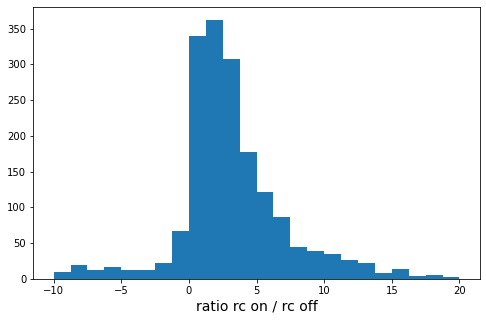

In [792]:
fig, ax = plt.subplots(figsize = (8,5))
ax.hist(integral_open/integral_closed, bins = np.linspace(-10,20,25))
ax.set_xlabel('ratio rc on / rc off', fontsize = 14)
(integral_open/integral_closed).mean()

now allow negative amp noise

In [793]:
sigma = 3
amplitude = amp
σamplitude = 1
x = np.arange(trace_length)

trace_closed = gaussian(x, 1000, 200)*amplitude
trace_open = ratio*trace_closed.copy()

do = np.array([trace_open * (1+np.random.randn(1)[0]*σamplitude) + np.random.randn(trace_length)*sigma for _ in range(nr_traces)])
dc = np.array([trace_closed * (1+np.random.randn(1)[0]*σamplitude)+ np.random.randn(trace_length)*sigma for _ in range(nr_traces)] )

lowpass_open = lowpass_data(do, 10e3, 100e3, order = 1) + offset
lowpass_closed = lowpass_data(dc, 10e3, 100e3, order = 1) + offset

# mean subtract
lowpass_open -= np.mean(lowpass_open[:,150:250], axis = 1)[:, np.newaxis]
lowpass_closed -= np.mean(lowpass_closed[:,150:250], axis = 1)[:, np.newaxis]

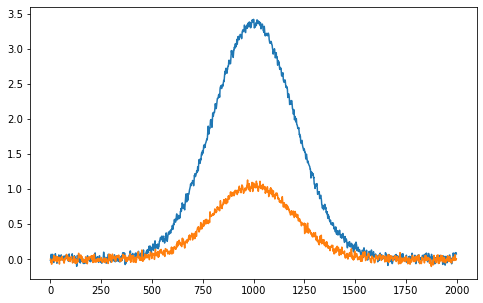

In [794]:
fig, ax = plt.subplots(figsize = (8,5))
ax.plot(lowpass_open.mean(axis = 0))
ax.plot(lowpass_closed.mean(axis = 0))

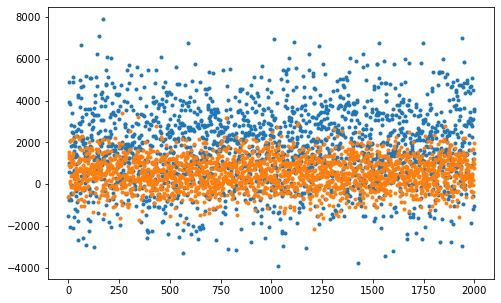

In [795]:
fig, ax = plt.subplots(figsize = (8,5))
ax.plot(np.trapz(lowpass_open, axis = 1), '.')
ax.plot(np.trapz(lowpass_closed, axis = 1), '.')

In [796]:
integral_open = np.trapz(lowpass_open, axis = 1)
integral_closed = np.trapz(lowpass_closed, axis = 1)
np.mean(integral_open)/np.mean(integral_closed)

3.209804479282385

In [797]:
np.trapz(lowpass_open.mean(axis = 0))/np.trapz(lowpass_closed.mean(axis = 0))

3.209804479282385

2.602100935570812

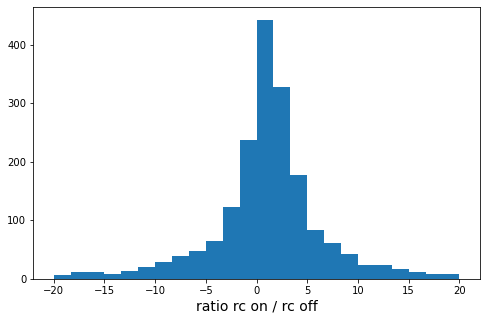

In [798]:
fig, ax = plt.subplots(figsize = (8,5))
ax.hist(integral_open/integral_closed, bins = np.linspace(-20,20,25))
ax.set_xlabel('ratio rc on / rc off', fontsize = 14)
(integral_open/integral_closed).mean()

In [799]:
navg = 10
averaged_open = lowpass_open.reshape(-1,navg,trace_length).mean(axis = 1)
averaged_closed = lowpass_closed.reshape(-1,navg,trace_length).mean(axis = 1)
avg_ints_open = np.trapz(averaged_open, axis = 1)
avg_ints_closed = np.trapz(averaged_closed, axis = 1)

5.106837226483759

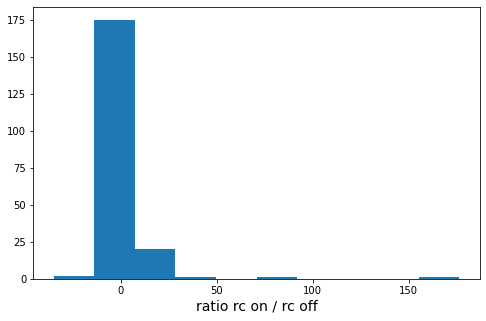

In [800]:
fig, ax = plt.subplots(figsize = (8,5))
ax.hist(avg_ints_open/avg_ints_closed)
ax.set_xlabel('ratio rc on / rc off', fontsize = 14)
ratios = avg_ints_open/avg_ints_closed
np.mean(ratios)

Text(0.5, 0, 'x [σ]')

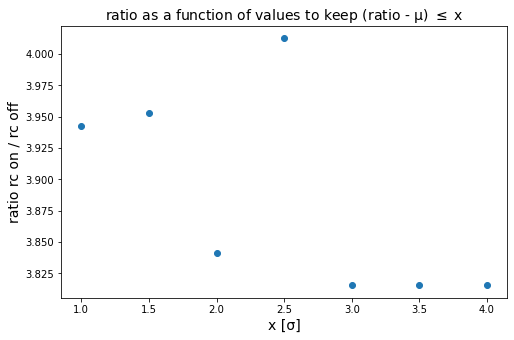

In [801]:
std_ranges = np.arange(1,4.25,0.5)
ratio_mean = []
for sr in std_ranges:
    ratios_mask = np.abs(ratios - ratios.mean()) <= sr*ratios.std()
    ratio_mean.append(ratios[ratios_mask].mean())

fig, ax = plt.subplots(figsize = (8,5))
ax.plot(std_ranges, ratio_mean, '.', ms = 12)
ax.set_title(f'ratio as a function of values to keep (ratio - μ) $\leq$ x', fontsize = 14)
ax.set_ylabel('ratio rc on / rc off', fontsize = 14)
ax.set_xlabel(f'x [σ]', fontsize = 14)

In [898]:
def random_walk_lowbound(lowbound, nr_steps):
    step_set = [-1,0,1]
    
    steps = [np.random.choice(step_set)]
    counter = 0
    while True:
        step = np.random.choice(step_set)
        if steps[counter]+step >= lowbound:
            steps.append(steps[counter]+step)
            counter += 1
        if nr_steps == counter:
            break
    return np.array(steps)

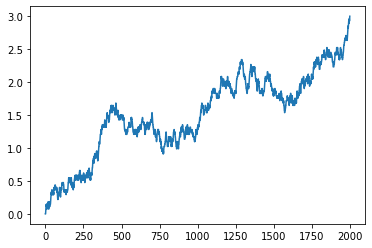

In [803]:
amp_walk = random_walk_lowbound(0, nr_traces)
amp_walk = amp_walk/amp_walk.max()
amp_walk *= 3
plt.plot(amp_walk)

In [805]:
sigma = 3
amplitude = amp
x = np.arange(trace_length)

trace_closed = gaussian(x, 1000, 200)*amplitude
trace_open = ratio*trace_closed.copy()

amp_walk = random_walk_lowbound(0, nr_traces)
amp_walk = amp_walk/amp_walk.max()
amp_walk *= 3

do = np.array([trace_open * amp_walk[_] + np.random.randn(trace_length)*sigma for _ in range(nr_traces)])
dc = np.array([trace_closed * amp_walk[_] + np.random.randn(trace_length)*sigma for _ in range(nr_traces)] )

lowpass_open = lowpass_data(do, 10e3, 100e3, order = 1) + offset
lowpass_closed = lowpass_data(dc, 10e3, 100e3, order = 1) + offset

lowpass_open -= np.mean(lowpass_open[:,150:250], axis = 1)[:, np.newaxis]
lowpass_closed -= np.mean(lowpass_closed[:,150:250], axis = 1)[:, np.newaxis]

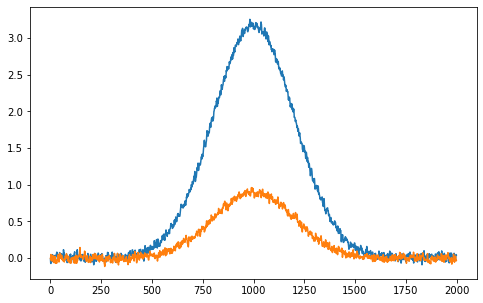

In [806]:
fig, ax = plt.subplots(figsize = (8,5))
ax.plot(lowpass_open.mean(axis = 0))
ax.plot(lowpass_closed.mean(axis = 0))

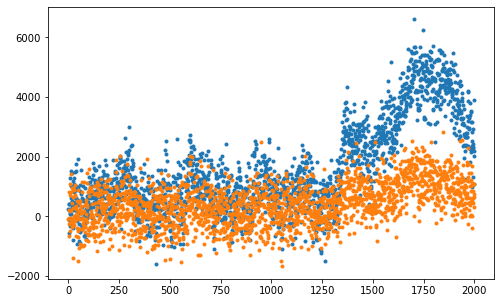

In [807]:
fig, ax = plt.subplots(figsize = (8,5))
ax.plot(np.trapz(lowpass_open, axis = 1), '.')
ax.plot(np.trapz(lowpass_closed, axis = 1), '.')

In [808]:
integral_open = np.trapz(lowpass_open, axis = 1)
integral_closed = np.trapz(lowpass_closed, axis = 1)
np.mean(integral_open)/np.mean(integral_closed)

3.6558094115762376

In [809]:
np.trapz(lowpass_open.mean(axis = 0))/np.trapz(lowpass_closed.mean(axis = 0))

3.655809411576238

-1.965480537545143

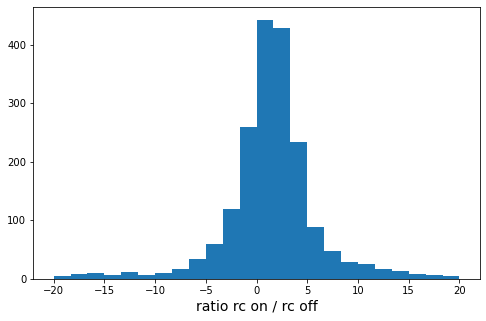

In [810]:
fig, ax = plt.subplots(figsize = (8,5))
ax.hist(integral_open/integral_closed, bins = np.linspace(-20,20,25))
ax.set_xlabel('ratio rc on / rc off', fontsize = 14)
(integral_open/integral_closed).mean()

In [811]:
navg = 10
averaged_open = lowpass_open.reshape(-1,navg,trace_length).mean(axis = 1)
averaged_closed = lowpass_closed.reshape(-1,navg,trace_length).mean(axis = 1)
avg_ints_open = np.trapz(averaged_open, axis = 1)
avg_ints_closed = np.trapz(averaged_closed, axis = 1)

3.908843783268304

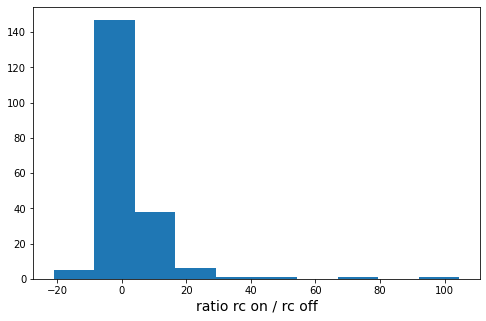

In [812]:
fig, ax = plt.subplots(figsize = (8,5))
ax.hist(avg_ints_open/avg_ints_closed)
ax.set_xlabel('ratio rc on / rc off', fontsize = 14)
ratios = avg_ints_open/avg_ints_closed
np.mean(ratios)

random walk around an offset of 1, e.g. normal amplitude

In [819]:
sigma = 20
amplitude = amp
x = np.arange(trace_length)

trace_closed = gaussian(x, 1000, 200)*amplitude
trace_open = ratio*trace_closed.copy()

amp_walk = random_walk_lowbound(0, nr_traces)
amp_walk = amp_walk/amp_walk.max()
amp_walk *= 3

do = np.array([trace_open * (1+amp_walk[_]) + np.random.randn(trace_length)*sigma for _ in range(nr_traces)])
dc = np.array([trace_closed * (1+amp_walk[_]) + np.random.randn(trace_length)*sigma for _ in range(nr_traces)] )

lowpass_open = lowpass_data(do, 10e3, 100e3, order = 1) + offset
lowpass_closed = lowpass_data(dc, 10e3, 100e3, order = 1) + offset

lowpass_open -= np.mean(lowpass_open[:,150:250], axis = 1)[:, np.newaxis]
lowpass_closed -= np.mean(lowpass_closed[:,150:250], axis = 1)[:, np.newaxis]

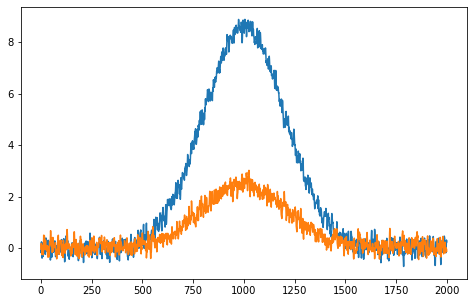

In [820]:
fig, ax = plt.subplots(figsize = (8,5))
ax.plot(lowpass_open.mean(axis = 0))
ax.plot(lowpass_closed.mean(axis = 0))

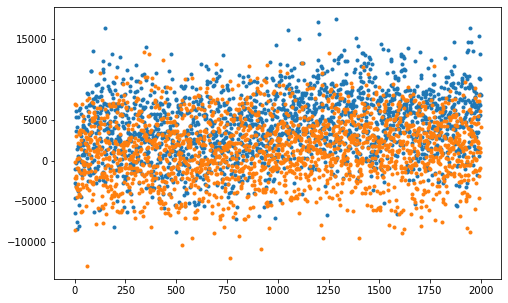

In [821]:
fig, ax = plt.subplots(figsize = (8,5))
ax.plot(np.trapz(lowpass_open, axis = 1), '.')
ax.plot(np.trapz(lowpass_closed, axis = 1), '.')

In [822]:
integral_open = np.trapz(lowpass_open, axis = 1)
integral_closed = np.trapz(lowpass_closed, axis = 1)
np.mean(integral_open)/np.mean(integral_closed)

3.1941365108400994

In [823]:
np.trapz(lowpass_open.mean(axis = 0))/np.trapz(lowpass_closed.mean(axis = 0))

3.1941365108401

1.456492716697719

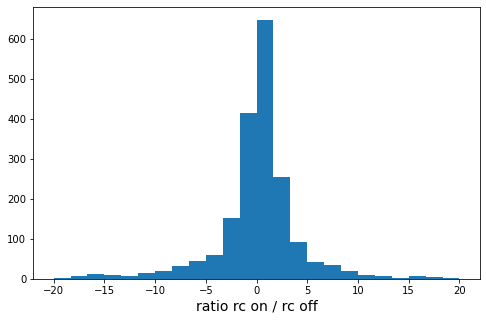

In [824]:
fig, ax = plt.subplots(figsize = (8,5))
ax.hist(integral_open/integral_closed, bins = np.linspace(-20,20,25))
ax.set_xlabel('ratio rc on / rc off', fontsize = 14)
(integral_open/integral_closed).mean()

In [837]:
navg = 10
averaged_open = lowpass_open.reshape(-1,navg,trace_length).mean(axis = 1)
averaged_closed = lowpass_closed.reshape(-1,navg,trace_length).mean(axis = 1)
avg_ints_open = np.trapz(averaged_open, axis = 1)
avg_ints_closed = np.trapz(averaged_closed, axis = 1)

2.8012793449916176

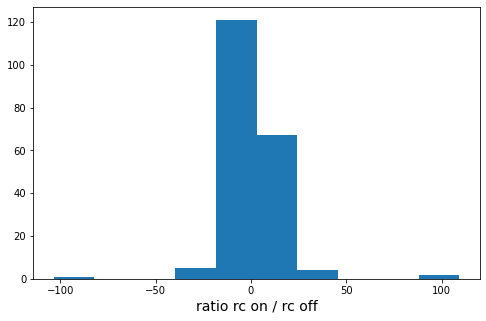

In [838]:
fig, ax = plt.subplots(figsize = (8,5))
ax.hist(avg_ints_open/avg_ints_closed)
ax.set_xlabel('ratio rc on / rc off', fontsize = 14)
ratios = avg_ints_open/avg_ints_closed
np.mean(ratios)

random walk around an offset, but different random walks for rc on and rc off

In [840]:
μma = 20
amplitude = amp
x = np.arange(trace_length)

trace_closed = gaussian(x, 1000, 200)*amplitude
trace_open = ratio*trace_closed.copy()

amp_walk = random_walk_lowbound(0, nr_traces)
amp_walk = amp_walk/amp_walk.max()
amp_walk *= 3

do = np.array([trace_open * (1+amp_walk[_]) + np.random.randn(trace_length)*sigma for _ in range(nr_traces)])


amp_walk = random_walk_lowbound(0, nr_traces)
amp_walk = amp_walk/amp_walk.max()
amp_walk *= 3

dc = np.array([trace_closed * (1+amp_walk[_]) + np.random.randn(trace_length)*sigma for _ in range(nr_traces)] )

lowpass_open = lowpass_data(do, 10e3, 100e3, order = 1) + offset
lowpass_closed = lowpass_data(dc, 10e3, 100e3, order = 1) + offset

lowpass_open -= np.mean(lowpass_open[:,150:250], axis = 1)[:, np.newaxis]
lowpass_closed -= np.mean(lowpass_closed[:,150:250], axis = 1)[:, np.newaxis]

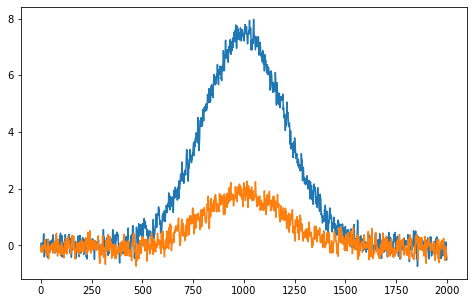

In [841]:
fig, ax = plt.subplots(figsize = (8,5))
ax.plot(lowpass_open.mean(axis = 0))
ax.plot(lowpass_closed.mean(axis = 0))

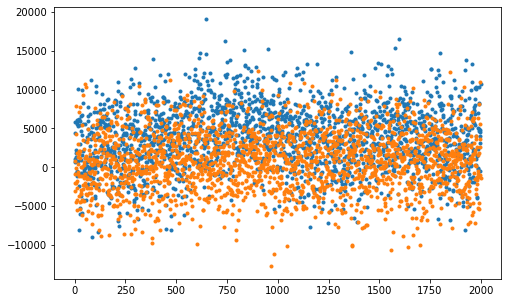

In [842]:
fig, ax = plt.subplots(figsize = (8,5))
ax.plot(np.trapz(lowpass_open, axis = 1), '.')
ax.plot(np.trapz(lowpass_closed, axis = 1), '.')

In [843]:
integral_open = np.trapz(lowpass_open, axis = 1)
integral_closed = np.trapz(lowpass_closed, axis = 1)
np.mean(integral_open)/np.mean(integral_closed)

4.708106356876502

In [844]:
np.trapz(lowpass_open.mean(axis = 0))/np.trapz(lowpass_closed.mean(axis = 0))

4.708106356876501

4.704175342275264

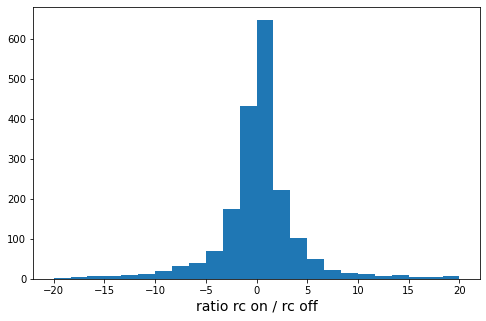

In [845]:
fig, ax = plt.subplots(figsize = (8,5))
ax.hist(integral_open/integral_closed, bins = np.linspace(-20,20,25))
ax.set_xlabel('ratio rc on / rc off', fontsize = 14)
(integral_open/integral_closed).mean()

In [846]:
navg = 10
averaged_open = lowpass_open.reshape(-1,navg,trace_length).mean(axis = 1)
averaged_closed = lowpass_closed.reshape(-1,navg,trace_length).mean(axis = 1)
avg_ints_open = np.trapz(averaged_open, axis = 1)
avg_ints_closed = np.trapz(averaged_closed, axis = 1)

-8.837478101102967

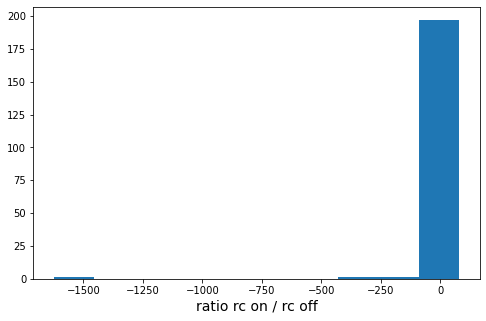

In [847]:
fig, ax = plt.subplots(figsize = (8,5))
ax.hist(avg_ints_open/avg_ints_closed)
ax.set_xlabel('ratio rc on / rc off', fontsize = 14)
ratios = avg_ints_open/avg_ints_closed
np.mean(ratios)

repeat a couple of times

In [1007]:
from tqdm import tqdm
navg = 100
nr_traces = 2000
res = []
for _ in tqdm(range(100)):
    sigma = 1
    amplitude = amp
    x = np.arange(trace_length)

    trace_closed = gaussian(x, 1000, 200)*amplitude
    trace_open = ratio*trace_closed.copy()

    amp_walk = random_walk_lowbound(0, nr_traces)
    amp_walk = amp_walk/amp_walk.max()
    amp_walk *= 2

    do = np.array([trace_open * (1+amp_walk[_]) + np.random.randn(trace_length)*sigma for _ in range(nr_traces)])


    amp_walk = random_walk_lowbound(0, nr_traces)
    amp_walk = amp_walk/amp_walk.max()
    amp_walk *= 1

    dc = np.array([trace_closed * (1+amp_walk[_]) + np.random.randn(trace_length)*sigma for _ in range(nr_traces)] )

    lowpass_open = lowpass_data(do, 10e3, 100e3, order = 1) - offset
    lowpass_closed = lowpass_data(dc, 10e3, 100e3, order = 1) - offset
    
    lowpass_open -= np.mean(lowpass_open[:,150:250], axis = 1)[:, np.newaxis]
    lowpass_closed -= np.mean(lowpass_closed[:,150:250], axis = 1)[:, np.newaxis]

    integral_open = np.trapz(lowpass_open, axis = 1)
    integral_closed = np.trapz(lowpass_closed, axis = 1)
    

    averaged_open = lowpass_open.reshape(-1,navg,trace_length).mean(axis = 1)
    averaged_closed = lowpass_closed.reshape(-1,navg,trace_length).mean(axis = 1)
    avg_ints_open = np.trapz(averaged_open, axis = 1)
    avg_ints_closed = np.trapz(averaged_closed, axis = 1)
    ratios = avg_ints_open/avg_ints_closed
    
    res.append((np.trapz(lowpass_open.mean(axis = 0))/np.trapz(lowpass_closed.mean(axis = 0)), 
                np.mean(integral_open)/np.mean(integral_closed),
                np.mean(ratios)))

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:36<00:00,  2.70it/s]


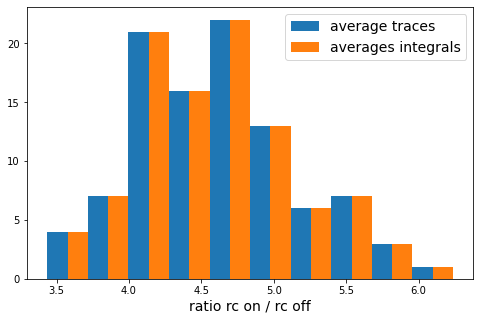

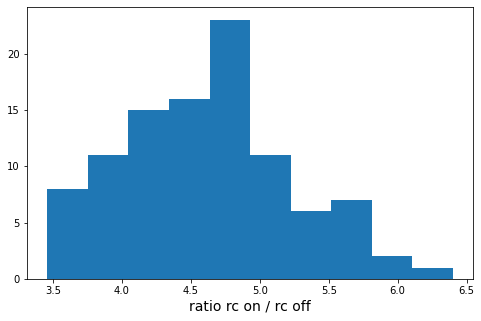

In [1008]:
ratio_alltrace, ratio_integralmean, ratio_bunched = zip(*res)
fig, ax = plt.subplots(figsize = (8,5))
ax.hist(ratio_alltrace, rwidth = 0.5, align = 'mid', label = 'average traces')
ax.hist(ratio_integralmean, rwidth = 0.5, align = 'right', label = 'averages integrals')

ax.set_xlabel('ratio rc on / rc off', fontsize = 14)
ax.legend(fontsize = 14)

fig, ax = plt.subplots(figsize = (8,5))
ax.hist(ratio_bunched)
ax.set_xlabel('ratio rc on / rc off', fontsize = 14);

same random walk for rc on and rc off, alternate between rc on and off to get a more realistic progresssion of the amplitudes, and have an upper bound in the random walk

In [991]:
def random_walk_bound(step, lowbound, highbound, nr_steps):
    step_set = np.array([-1,0,1])*step
    
    steps = [np.random.choice(step_set)]
    counter = 0
    while True:
        step = np.random.choice(step_set)
        if (steps[counter]+step >= lowbound) & (steps[counter]+step <= highbound):
            steps.append(steps[counter]+step)
            counter += 1
        if nr_steps == counter:
            break
    return np.array(steps)

In [1350]:
nr_traces = 2000
sigma = np.sqrt(2)
amplitude = amp
x = np.arange(trace_length)

trace_closed = gaussian(x, 1000, 200)*amplitude
trace_open = ratio*trace_closed.copy()

amp_walk = random_walk_bound(0.05, 0, 2, nr_traces*2)
amp_walk = amp_walk/amp_walk.max()

do = np.array([trace_open * amp_walk[::2][_] + np.random.randn(trace_length)*sigma for _ in range(nr_traces)])
dc = np.array([trace_closed * amp_walk[1::2][_] + np.random.randn(trace_length)*sigma for _ in range(nr_traces)] )

lowpass_open = lowpass_data(do, 10e3, 100e3, order = 1) + offset
lowpass_closed = lowpass_data(dc, 10e3, 100e3, order = 1) + offset

lowpass_open -= np.mean(lowpass_open[:,150:250], axis = 1)[:, np.newaxis]
lowpass_closed -= np.mean(lowpass_closed[:,150:250], axis = 1)[:, np.newaxis]

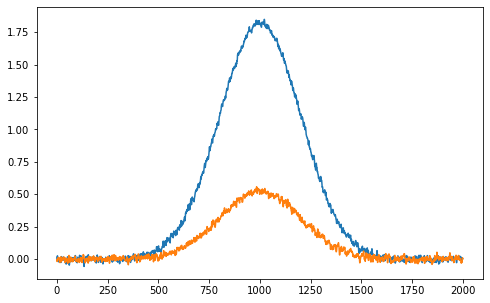

In [1351]:
fig, ax = plt.subplots(figsize = (8,5))
ax.plot(lowpass_open.mean(axis = 0))
ax.plot(lowpass_closed.mean(axis = 0))

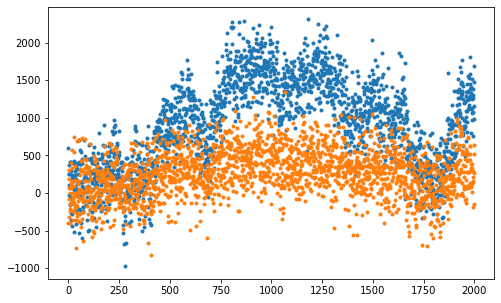

In [1352]:
fig, ax = plt.subplots(figsize = (8,5))
ax.plot(np.trapz(lowpass_open, axis = 1), '.')
ax.plot(np.trapz(lowpass_closed, axis = 1), '.')

3.460 +/- 0.105


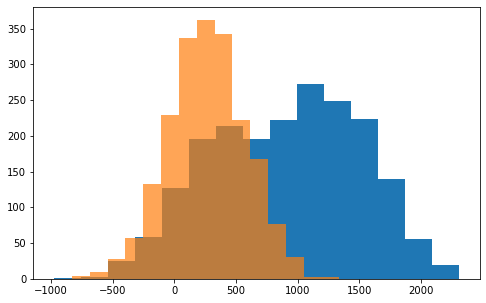

In [1353]:
integral_open = np.trapz(lowpass_open, axis = 1)
integral_closed = np.trapz(lowpass_closed, axis = 1)

fig, ax = plt.subplots(figsize = (8,5))
ax.hist(integral_open, bins = 15)
ax.hist(integral_closed, bins = 15, alpha = 0.7)

r = np.mean(integral_open)/np.mean(integral_closed)
e = np.abs(r)* np.sqrt((np.std(integral_open)/np.sqrt(nr_traces)/np.mean(integral_open))**2+(np.std(integral_closed)/np.sqrt(nr_traces)/np.mean(integral_closed))**2)
print(f'{r:.3f} +/- {e:.3f}')

In [1354]:
# taking the std first over all traces and then taking the mean
r = np.trapz(lowpass_open.mean(axis = 0))/np.trapz(lowpass_closed.mean(axis = 0))

# integral error propagation, getting the error on each timestep from the std over all traces
# this assumes 
eo = np.sqrt((np.std(lowpass_open, axis = 0).mean()/np.sqrt(nr_traces))**2 * trace_length)
ec = np.sqrt((np.std(lowpass_closed, axis = 0).mean()/np.sqrt(nr_traces))**2 * trace_length)

e = np.abs(r) * np.sqrt((eo/(np.trapz(lowpass_open.mean(axis = 0))))**2 + (ec/(np.trapz(lowpass_closed.mean(axis = 0))))**2)

print(f'{r:.3f} +/- {e:.3f}')

3.460 +/- 0.010


In [1355]:
# or only taking the std first over all traces and then taking the mean over the first 250 points
r = np.trapz(lowpass_open.mean(axis = 0))/np.trapz(lowpass_closed.mean(axis = 0))

# integral error propagation, getting the error on each timestep from the std over all traces
eo = np.sqrt((np.std(lowpass_open, axis = 0)[:250].mean()/np.sqrt(nr_traces))**2 * trace_length)
ec = np.sqrt((np.std(lowpass_closed, axis = 0)[:250].mean()/np.sqrt(nr_traces))**2 * trace_length)

e = np.abs(r) * np.sqrt((eo/(np.trapz(lowpass_open.mean(axis = 0))))**2 + (ec/(np.trapz(lowpass_closed.mean(axis = 0))))**2)

print(f'{r:.3f} +/- {e:.3f}')

3.460 +/- 0.010


In [1356]:
r = np.trapz(lowpass_open.mean(axis = 0))/np.trapz(lowpass_closed.mean(axis = 0))

# integral error propagation, getting the error on each timestep from the std over all traces
# this assumes 
eo = np.sqrt(np.std(lowpass_open.mean(axis = 0))**2 * trace_length)
ec = np.sqrt(np.std(lowpass_closed.mean(axis = 0))**2 * trace_length)

e = np.abs(r) * np.sqrt((eo/(np.trapz(lowpass_open.mean(axis = 0))))**2 + (ec/(np.trapz(lowpass_closed.mean(axis = 0))))**2)

print(f'{r:.3f} +/- {e:.3f}')

3.460 +/- 0.148


In [1357]:
# or only taking the std over the first 250 points
r = np.trapz(lowpass_open.mean(axis = 0))/np.trapz(lowpass_closed.mean(axis = 0))

# integral error propagation, getting the error on each timestep from the std over all traces
# this assumes 
eo = np.sqrt(np.std(lowpass_open.mean(axis = 0)[:250])**2 * trace_length)
ec = np.sqrt(np.std(lowpass_closed.mean(axis = 0)[:250])**2 * trace_length)

e = np.abs(r) * np.sqrt((eo/(np.trapz(lowpass_open.mean(axis = 0))))**2 + (ec/(np.trapz(lowpass_closed.mean(axis = 0))))**2)

print(f'{r:.3f} +/- {e:.3f}')

3.460 +/- 0.008


2.6144320739286946

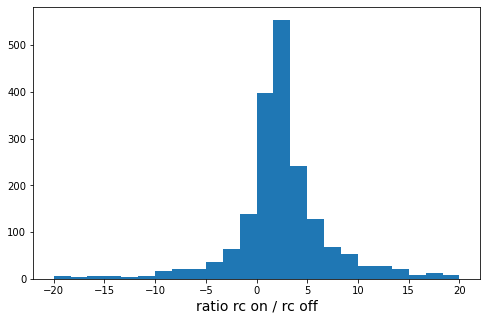

In [1358]:
fig, ax = plt.subplots(figsize = (8,5))
ax.hist(integral_open/integral_closed, bins = np.linspace(-20,20,25))
ax.set_xlabel('ratio rc on / rc off', fontsize = 14)
(integral_open/integral_closed).mean()

In [1359]:
navg = 50
averaged_open = lowpass_open.reshape(-1,navg,trace_length).mean(axis = 1)
averaged_closed = lowpass_closed.reshape(-1,navg,trace_length).mean(axis = 1)
avg_ints_open = np.trapz(averaged_open, axis = 1)
avg_ints_closed = np.trapz(averaged_closed, axis = 1)

3.631065083690642

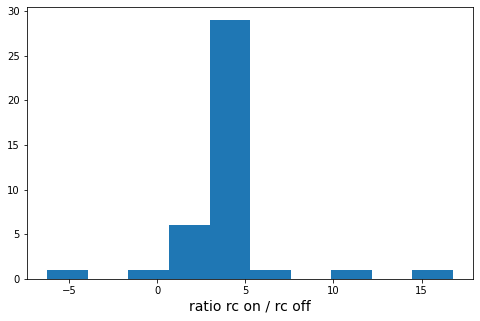

In [1360]:
fig, ax = plt.subplots(figsize = (8,5))
ax.hist(avg_ints_open/avg_ints_closed)
ax.set_xlabel('ratio rc on / rc off', fontsize = 14)
ratios = avg_ints_open/avg_ints_closed
np.mean(ratios)

Weighted average of bunches

In [1361]:
def weighted_avg_and_std(values, weights):
    """
    Return the weighted average and standard deviation.

    values, weights -- Numpy ndarrays with the same shape.
    """
    average = np.average(values, weights=weights)
    # Fast and numerically precise:
    variance = np.average((values-average)**2, weights=weights)
    return (average, np.sqrt(variance))

In [1364]:
navg = 200
averaged_open = lowpass_open.reshape(-1,navg,trace_length).mean(axis = 1)
averaged_closed = lowpass_closed.reshape(-1,navg,trace_length).mean(axis = 1)

avg_ints_open = np.trapz(averaged_open, axis = 1)
avg_ints_closed = np.trapz(averaged_closed, axis = 1)

r = avg_ints_open/avg_ints_closed

eo = np.sqrt(np.sum((lowpass_open.reshape(-1,navg,trace_length).std(axis = 1)/np.sqrt(navg))**2, axis = 1))
ec = np.sqrt(np.sum((lowpass_closed.reshape(-1,navg,trace_length).std(axis = 1)/np.sqrt(navg))**2, axis = 1))
e = np.abs(r) * np.sqrt(np.sum( (eo/avg_ints_open)**2 + (ec/avg_ints_closed)**2))

rw, ew = weighted_avg_and_std(r, 1/e**2)
print(f'{rw:.3f} +/- {ew/np.sqrt(len(r)):.3f}')

3.243 +/- 0.173


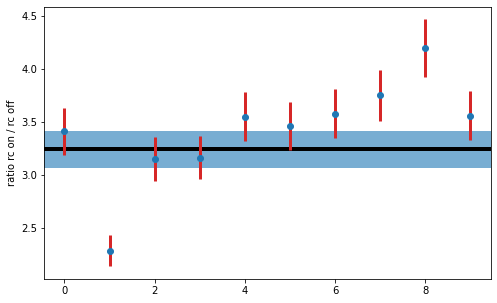

In [1376]:
fig, ax = plt.subplots(figsize = (8,5))

ax.errorbar(np.arange(len(averaged_open)), r, yerr = e, fmt = '.', ecolor = 'C3', ms = 12, lw = 3)
ax.axhline(rw, zorder = 0, color = 'k', lw = 4)

import matplotlib.transforms as mtransforms
trans = mtransforms.blended_transform_factory(ax.transAxes, ax.transData)
l = rw - ew/np.sqrt(len(r))
u = rw + ew/np.sqrt(len(r))
ax.fill_between(np.arange(len(r)), l * np.ones(len(r)), u*np.ones(len(r)), alpha = 0.6, zorder = 0,
                transform = trans)
ax.set_ylabel('ratio rc on / rc off');

3.4841429874940997

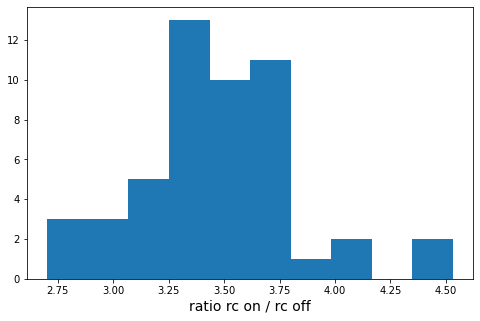

In [1298]:
fig, ax = plt.subplots(figsize = (8,5))
ax.hist(avg_ints_open/avg_ints_closed)
ax.set_xlabel('ratio rc on / rc off', fontsize = 14)
ratios = avg_ints_open/avg_ints_closed
np.mean(ratios)

In [1013]:
from tqdm import tqdm
navg = 50
nr_traces = 2000
res = []
for _ in tqdm(range(100)):
    sigma = np.sqrt(2)
    amplitude = amp
    x = np.arange(trace_length)

    trace_closed = gaussian(x, 1000, 200)*amplitude
    trace_open = ratio*trace_closed.copy()

    amp_walk = random_walk_bound(0.05, 0, 2, nr_traces*2)
    amp_walk = amp_walk/amp_walk.max()

    do = np.array([trace_open * amp_walk[::2][_] + np.random.randn(trace_length)*sigma for _ in range(nr_traces)])
    dc = np.array([trace_closed * amp_walk[1::2][_] + np.random.randn(trace_length)*sigma for _ in range(nr_traces)] )

    lowpass_open = lowpass_data(do, 10e3, 100e3, order = 1) - offset
    lowpass_closed = lowpass_data(dc, 10e3, 100e3, order = 1) - offset
    
    lowpass_open -= np.mean(lowpass_open[:,150:250], axis = 1)[:, np.newaxis]
    lowpass_closed -= np.mean(lowpass_closed[:,150:250], axis = 1)[:, np.newaxis]

    integral_open = np.trapz(lowpass_open, axis = 1)
    integral_closed = np.trapz(lowpass_closed, axis = 1)
    

    averaged_open = lowpass_open.reshape(-1,navg,trace_length).mean(axis = 1)
    averaged_closed = lowpass_closed.reshape(-1,navg,trace_length).mean(axis = 1)
    avg_ints_open = np.trapz(averaged_open, axis = 1)
    avg_ints_closed = np.trapz(averaged_closed, axis = 1)
    ratios = avg_ints_open/avg_ints_closed
    
    res.append((np.trapz(lowpass_open.mean(axis = 0))/np.trapz(lowpass_closed.mean(axis = 0)), 
                np.mean(integral_open)/np.mean(integral_closed),
                np.mean(ratios)))

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:36<00:00,  2.72it/s]


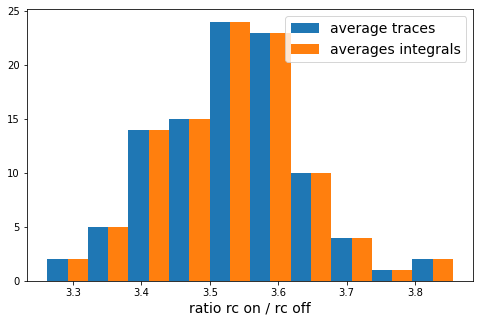

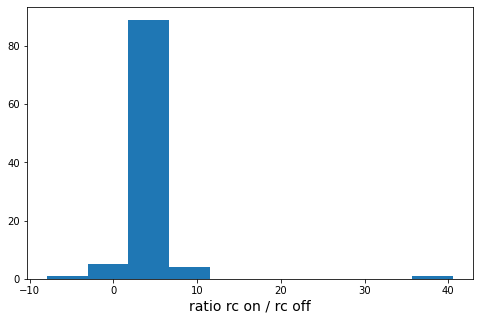

In [1014]:
ratio_alltrace, ratio_integralmean, ratio_bunched = zip(*res)
fig, ax = plt.subplots(figsize = (8,5))
ax.hist(ratio_alltrace, rwidth = 0.5, align = 'mid', label = 'average traces')
ax.hist(ratio_integralmean, rwidth = 0.5, align = 'right', label = 'averages integrals')

ax.set_xlabel('ratio rc on / rc off', fontsize = 14)
ax.legend(fontsize = 14)

fig, ax = plt.subplots(figsize = (8,5))
ax.hist(ratio_bunched)
ax.set_xlabel('ratio rc on / rc off', fontsize = 14);